In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Veri setini yükleme
df = pd.read_csv('/Users/emin/Desktop/Biyoinformatik/dataset.csv')

# Sleep Disorder sütunundaki boş değerleri 'None' stringi ile dolduralım
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('None')

# İlk 5 satırı görüntüleme
print("Veri Setinin İlk 5 Satırı:")
print(df.head())

print("\nVeri Seti Bilgileri:")
print(df.info())

Veri Setinin İlk 5 Satırı:
   Person ID Gender  Age            Occupation  Sleep Duration  \
0          1   Male   27     Software Engineer             6.1   
1          2   Male   28                Doctor             6.2   
2          3   Male   28                Doctor             6.2   
3          4   Male   28  Sales Representative             5.9   
4          5   Male   28  Sales Representative             5.9   

   Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                 6                       42             6   Overweight   
1                 6                       60             8       Normal   
2                 6                       60             8       Normal   
3                 4                       30             8        Obese   
4                 4                       30             8        Obese   

  Blood Pressure  Heart Rate  Daily Steps Sleep Disorder  
0         126/83          77         4200           None  
1      

In [2]:
# Kan Basıncını Ayrıştırma
if 'Blood Pressure' in df.columns:
    df[['Systolic_BP', 'Diastolic_BP']] = df['Blood Pressure'].str.split('/', expand=True)
    df['Systolic_BP'] = df['Systolic_BP'].astype(int)
    df['Diastolic_BP'] = df['Diastolic_BP'].astype(int)
    df = df.drop(columns=['Blood Pressure'])

# Uyku Bozukluklarını Ayrıştırma (GELİŞMİŞ ANALİZ)
# Basit 0,1,2 kodlaması yerine, her hastalık için ayrı 1/0 sütunları oluşturuyoruz.
# Bu sayede korelasyon analizi çok daha doğru sonuç verecektir.

# 1. Insomnia Varlığı
df['Has_Insomnia'] = df['Sleep Disorder'].apply(lambda x: 1 if x == 'Insomnia' else 0)

# 2. Uyku Apnesi Varlığı
df['Has_Sleep_Apnea'] = df['Sleep Disorder'].apply(lambda x: 1 if x == 'Sleep Apnea' else 0)

# 3. Herhangi Bir Bozukluk Varlığı (None olmayanlar)
df['Has_Any_Disorder'] = df['Sleep Disorder'].apply(lambda x: 0 if x == 'None' else 1)

print("\nYeni Hastalık Gösterge Sütunları Eklendi:")
print(df[['Sleep Disorder', 'Has_Insomnia', 'Has_Sleep_Apnea', 'Has_Any_Disorder']].head())


Yeni Hastalık Gösterge Sütunları Eklendi:
  Sleep Disorder  Has_Insomnia  Has_Sleep_Apnea  Has_Any_Disorder
0           None             0                0                 0
1           None             0                0                 0
2           None             0                0                 0
3    Sleep Apnea             0                1                 1
4    Sleep Apnea             0                1                 1


In [3]:
# Diğer Kategorik Verileri Sayısallaştırma
categorical_cols = ['Gender', 'Occupation', 'BMI Category']
for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].astype('category').cat.codes

# Orijinal 'Sleep Disorder' metin sütununu korelasyon matrisine katmıyoruz,
# onun yerine yeni oluşturduğumuz binary sütunları kullanacağız.
print("\nKategorik Veriler Sayısallaştırıldı.")


Kategorik Veriler Sayısallaştırıldı.


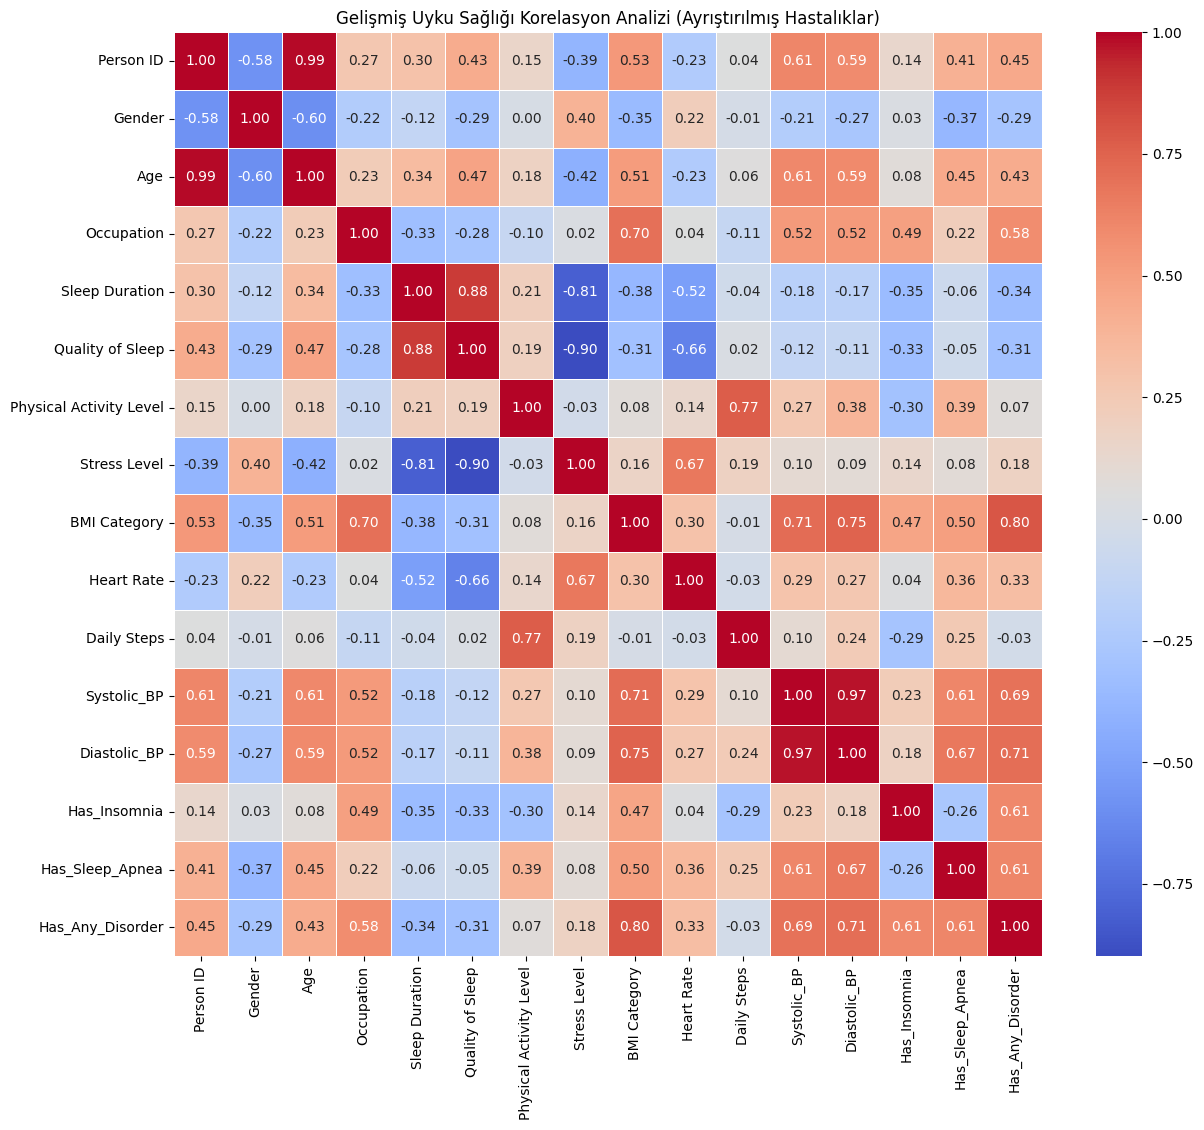


--- INSOMNIA (Uykusuzluk) ile En Güçlü İlişkiler ---
Has_Insomnia               1.000000
Has_Any_Disorder           0.605234
Occupation                 0.488584
BMI Category               0.472580
Systolic_BP                0.229359
Diastolic_BP               0.182657
Stress Level               0.139380
Person ID                  0.135697
Age                        0.078478
Heart Rate                 0.037201
Gender                     0.027619
Has_Sleep_Apnea           -0.261378
Daily Steps               -0.288518
Physical Activity Level   -0.302352
Quality of Sleep          -0.332406
Sleep Duration            -0.347618
Name: Has_Insomnia, dtype: float64

--- SLEEP APNEA (Uyku Apnesi) ile En Güçlü İlişkiler ---
Has_Sleep_Apnea            1.000000
Diastolic_BP               0.673079
Systolic_BP                0.611389
Has_Any_Disorder           0.610180
BMI Category               0.496594
Age                        0.445719
Person ID                  0.405977
Physical Activity Level  

In [4]:
# Gelişmiş Korelasyon Analizi

# Sadece sayısal sütunları seçelim (Sleep Disorder hariç)
numeric_df = df.select_dtypes(include=['int64', 'int32', 'float64', 'int8'])
correlation_matrix = numeric_df.corr()

# Isı Haritası
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Gelişmiş Uyku Sağlığı Korelasyon Analizi (Ayrıştırılmış Hastalıklar)')
plt.show()

# Özel Analiz: Hangi faktörler Insomnia'yı tetikliyor?
print("\n--- INSOMNIA (Uykusuzluk) ile En Güçlü İlişkiler ---")
print(correlation_matrix['Has_Insomnia'].sort_values(ascending=False))

# Özel Analiz: Hangi faktörler Uyku Apnesi'ni tetikliyor?
print("\n--- SLEEP APNEA (Uyku Apnesi) ile En Güçlü İlişkiler ---")
print(correlation_matrix['Has_Sleep_Apnea'].sort_values(ascending=False))

# Özel Analiz: Stres ve Uyku Kalitesi İlişkisi
print("\n--- Stres Seviyesi ve Uyku Kalitesi Arasındaki İlişki ---")
print(f"Korelasyon Katsayısı: {correlation_matrix.loc['Stress Level', 'Quality of Sleep']:.4f}")